<a href="https://colab.research.google.com/github/SebastianNavarro1/EDA_FundamentosML_SebastianNavarro/blob/main/Prueba_Machine_SebastianNavarro_arreglo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Aqui importamos todas las librerias necesarias para trabajar

  Ocupamos pandas para el procesado de la informacion, como puede ser leer el dataset

  Matplotlib para la visualizacion de graficos

  Seaborn para la visualizacion de boxplots



In [ ]:
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

**1 IMPORTAR DATOS**

Aqui se importa toda la informacion del dataset y se muestran los 10 primeros datos de cada Columna


In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=",", encoding='latin-1')
df.head(10)

Saving data.csv.zip to data.csv.zip


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


**2 VER LOS DATOS**
Aqui podemos ver la cantidad de datos de cada columna
Se aprecia que en la mayoria de columnas hay un total de 541909 datos en las descripciones baja un poco y en el customer ID tambien baja ya que no hay tantos compradores diferentes.

Tambien vemos los tipos de datos de las columnas

Tambien vemos cuantos datos hay nulos que en este caso no hay ninguno

Y vemos las estadisticas de los datos numericos como pueden ser la media el promedio y los cuartiles



In [ ]:
print("Cantidad de datos")
print(df.count())
print(" \nColumnas y tipos de datos:")
df.info()
print("\n Valores nulos:")
df.isnull().sum()
print("\n Estadísticas:")
df.describe()

Cantidad de datos
InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64
 
Columnas y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB

 Valores nulos:

 Estadísticas:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


3 Arreglar tipos de datos y agregar columnas


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # CONVERTIR A TIPO DE DATO FECHA
df_clean = df.dropna(subset=['CustomerID', 'Description'])  # ELIMINAR VALORES NULOS
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]  # ELIMINAR VALORES NEGATIVOS
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']  # COLUMNA PRECIO TOTAL

**4 Ver los productos mas vendidos**

In [ ]:
top_productos_vendidos = df_clean.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
top_productos_rentables = df_clean.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).head(10)

Aqui apreciamos los 10 productos mas vendidos siendo los primeros 3

Paper Craft

Medium Ceramic

World War 2 Gliders ASSTD

Y los 10 mas rentables siendo los primeros 3 el
Paper Craft
Regency Cakestand
White Hanging Heart

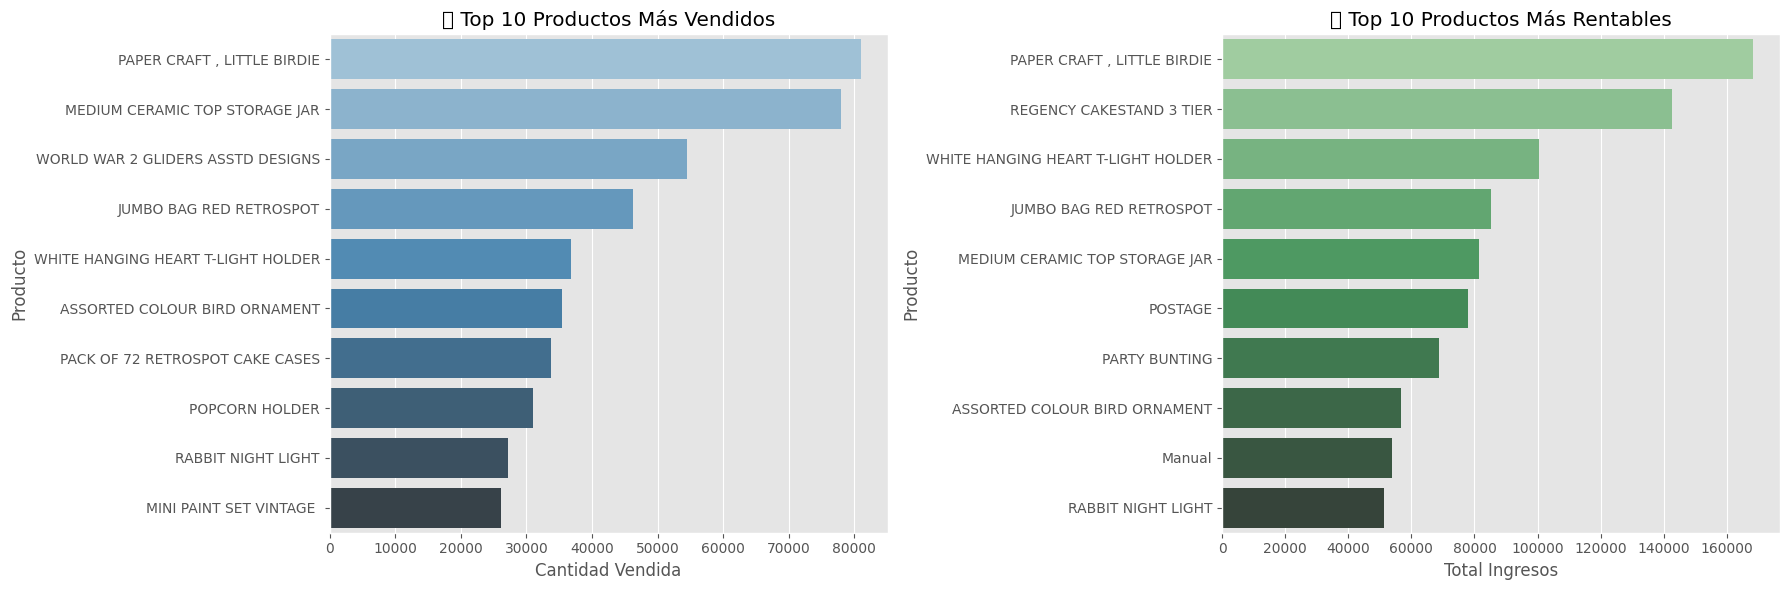

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(x=top_productos_vendidos.values, y=top_productos_vendidos.index, ax=axes[0], palette="Blues_d")
axes[0].set_title(" Top 10 Productos Más Vendidos")
axes[0].set_xlabel("Cantidad Vendida")
axes[0].set_ylabel("Producto")

sns.barplot(x=top_productos_rentables.values, y=top_productos_rentables.index, ax=axes[1], palette="Greens_d")
axes[1].set_title(" Top 10 Productos Más Rentables")
axes[1].set_xlabel("Total Ingresos")
axes[1].set_ylabel("Producto")
plt.tight_layout()
plt.show()

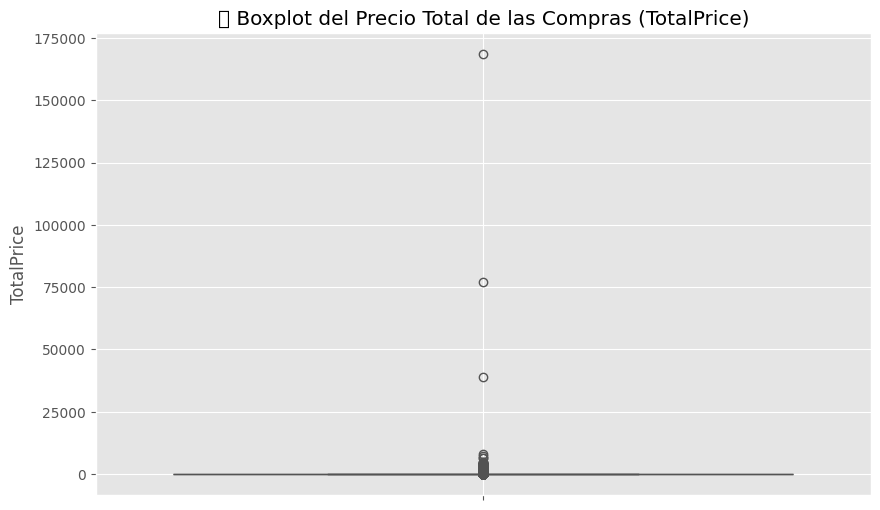

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_clean['TotalPrice'])
plt.title('Boxplot del Precio Total de las Compras (TotalPrice)')
plt.ylabel('TotalPrice')
plt.grid(True)
plt.show()


**5 VER LOS DATOS POR PAIS**

Aqui apreciamos los paises que mas compran en cantidad de dinero siendo los mas importantes

Reino Unido

Paises bajos

Irlanda

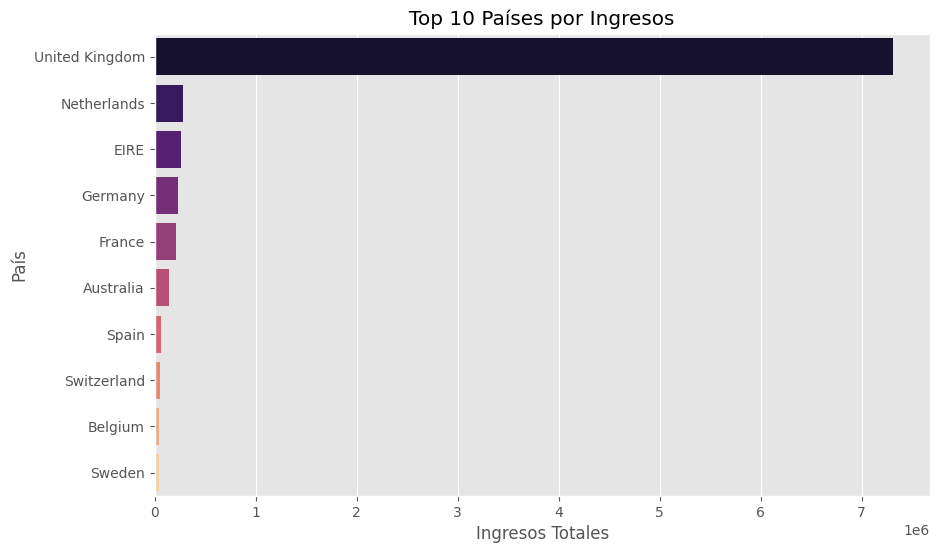

In [ ]:
ventas_pais = df_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=ventas_pais.values, y=ventas_pais.index, palette='magma')
plt.title("Top 10 Países por Ingresos")
plt.xlabel("Ingresos Totales")
plt.ylabel("País")
plt.show()

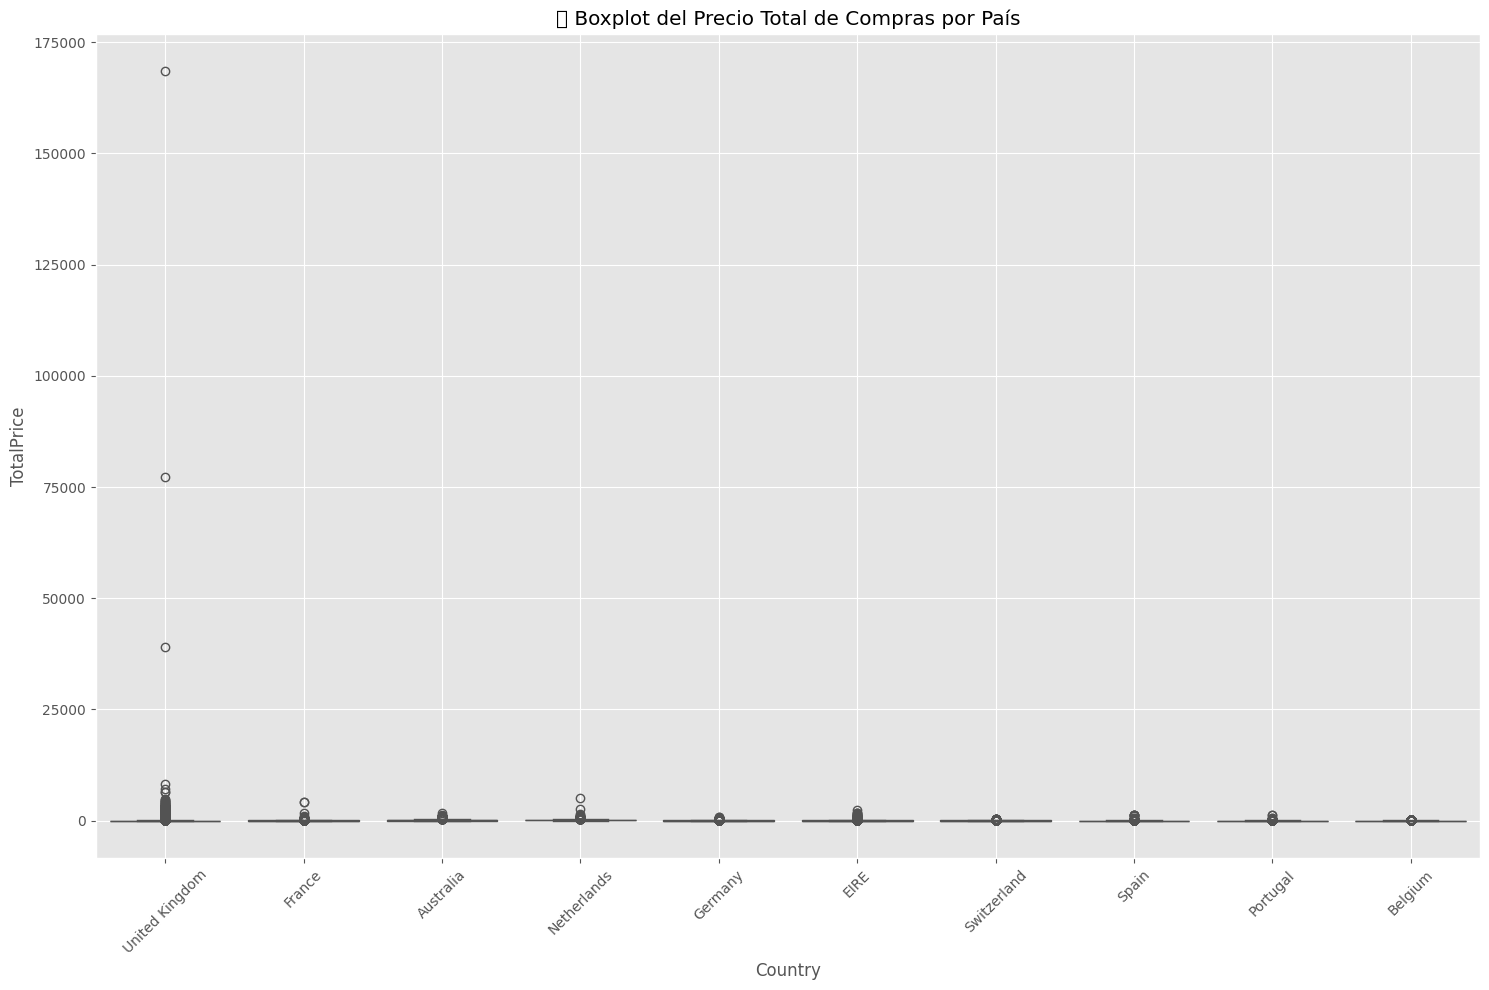

In [30]:
plt.figure(figsize=(15, 10))
# Tomamos solo los 10 países con más ventas para que el gráfico sea más claro
top_paises = df_clean['Country'].value_counts().head(10).index
df_top_paises = df_clean[df_clean['Country'].isin(top_paises)]

sns.boxplot(x='Country', y='TotalPrice', data=df_top_paises)
plt.title('Boxplot del Precio Total de Compras por País')
plt.ylabel('TotalPrice')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**6 CUALES SON LOS CLIENTES QUE MAS GASTAN**

Aqui podemos apreciar los clientes que mas han comprado en el E-commerce
siendo sus ID
14646
18102

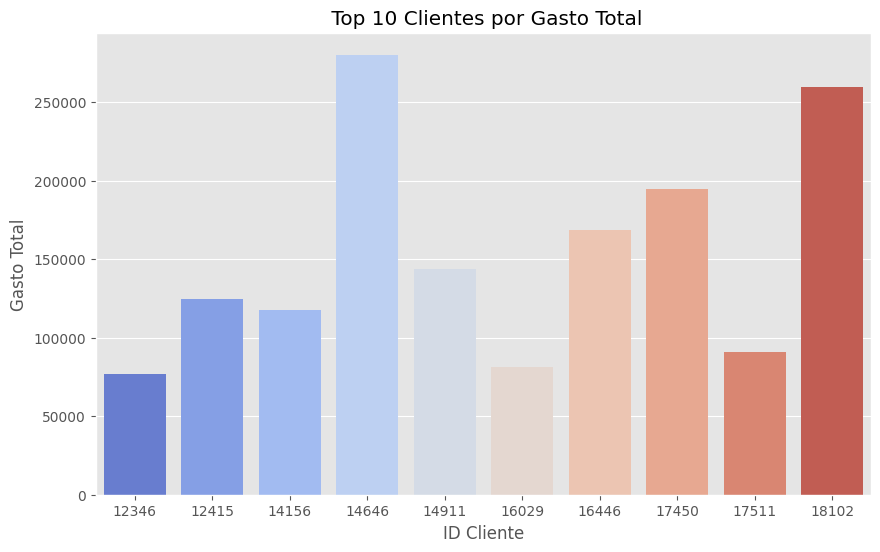

In [ ]:
top_clientes = df_clean.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_clientes.values, x=top_clientes.index.astype(int), palette='coolwarm')
plt.title(" Top 10 Clientes por Gasto Total")
plt.ylabel("Gasto Total")
plt.xlabel("ID Cliente")
plt.show()

**7 VENTAS EN EL TIEMPO**

Aqui apreciamos los ingresos mensuales siendo el mejor mes

Noviembre 2011

Y el peor mes

Febrero de 2011

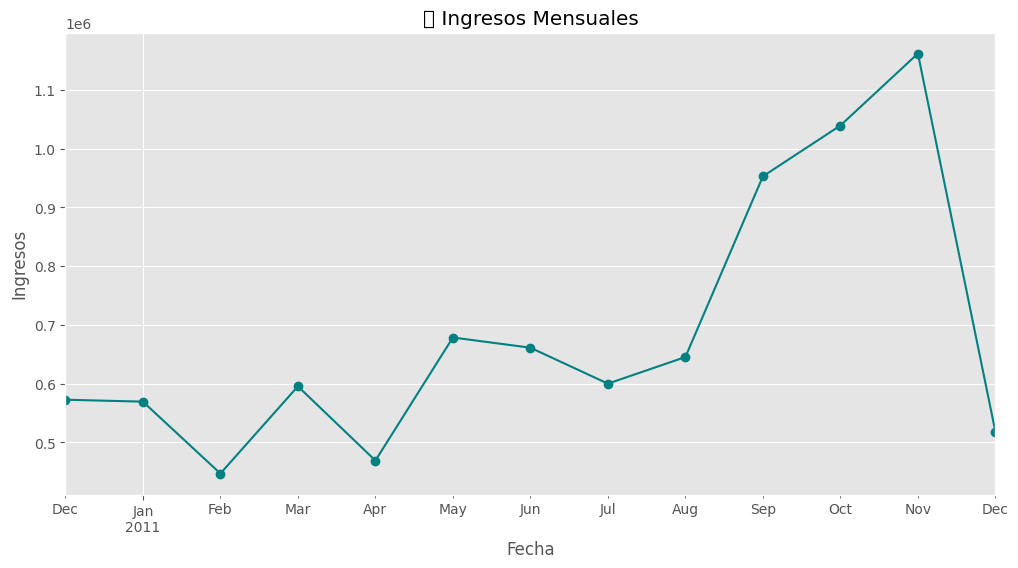

In [ ]:
ventas_por_fecha = df_clean.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()
plt.figure(figsize=(12, 6))
ventas_por_fecha.plot(marker='o', color='teal')
plt.title("Ingresos Mensuales")
plt.xlabel("Fecha")
plt.ylabel("Ingresos")
plt.grid(True)
plt.show()

**8 MAPA DE CALOR CORRELACIONES**

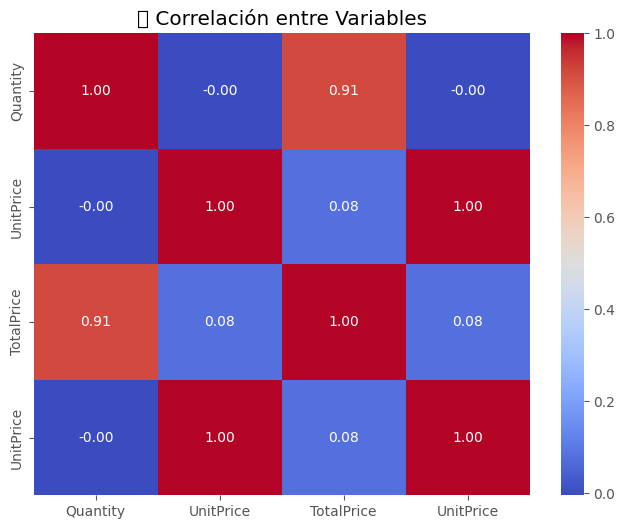

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[['Quantity', 'UnitPrice', 'TotalPrice', 'UnitPrice']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔗 Correlación entre Variables")
plt.show()